#### Capstone 2 Arima Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib  as mpl 
%matplotlib inline

# Load Specific forecasting tools
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults, ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller



# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#get data
eurusd = pd.read_csv(r'eurusd.csv', index_col=0, parse_dates=True, skipinitialspace=True)

In [3]:
eurusd.head()

,Open,High,Low,close,Change,Volume
2000-01-03,1.0085,1.0280,1.0055,1.0256,0.0168,0
2000-01-04,1.0255,1.0340,1.0217,1.0301,0.0045,0
2000-01-05,1.0304,1.0400,1.0289,1.0315,0.0014,0
2000-01-06,1.0320,1.0413,1.0283,1.0315,0.0000,0
2000-01-07,1.0317,1.0333,1.0263,1.0296,-0.0019,0


In [4]:
eurusd.tail()

,Open,High,Low,close,Change,Volume
2019-12-20,1.11197,1.11246,1.10661,1.10748,-0.00448,119919
2019-12-23,1.10822,1.10954,1.10697,1.10884,0.00136,109071
2019-12-24,1.10882,1.10937,1.10693,1.10877,-0.00007,102337
2019-12-26,1.10925,1.11115,1.10819,1.10952,0.00075,59499
2019-12-27,1.10953,1.11878,1.10939,1.11726,0.00774,157620


In [5]:
eurusd.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', length=5187, freq=None)

In [6]:
eurusd.dtypes

Open      float64
High      float64
Low       float64
close     float64
Change    float64
Volume      int64
dtype: object

In [7]:
eurusdclose = eurusd.close

In [8]:
eurusdclose.describe() 

count    5187.000000
mean        1.209322
std         0.166613
min         0.827100
25%         1.110505
50%         1.225900
75%         1.331400
max         1.599000
Name: close, dtype: float64

In [9]:
# Check for missing data
print(eurusd.isnull().sum())

Open      0
High      0
Low       0
close     0
Change    0
Volume    0
dtype: int64


There are no missing values in the data set

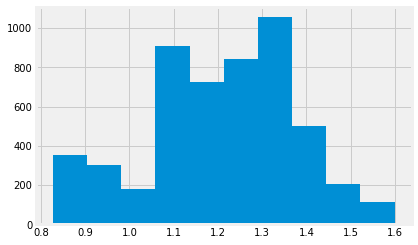

In [11]:
eurusdclose.hist()

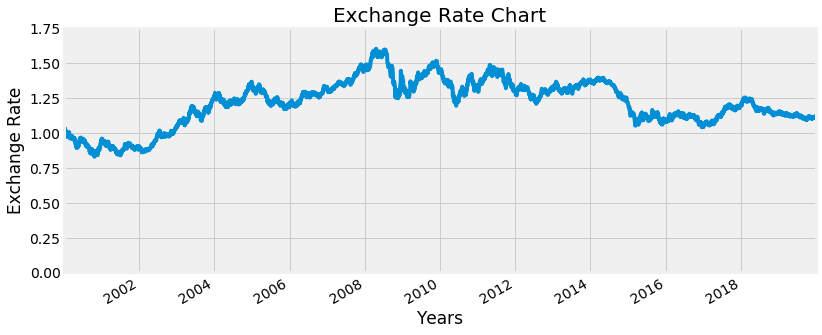

In [12]:
eurusd['close'].plot(ylim=[0,1.75],figsize = (12,5)).autoscale(axis='x', tight=True)
plt.title('Exchange Rate Chart', size=20)
plt.xlabel('Years', size=17)
plt.ylabel('Exchange Rate', size=17)
plt.autoscale(enable=True, axis='x', tight=True)
plt.tick_params(labelsize=14)

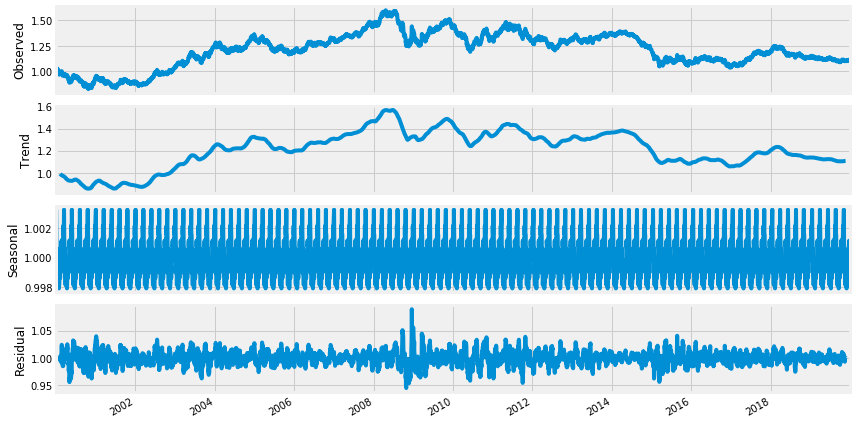

In [90]:
# Carry out Decomposition

seasonal = seasonal_decompose(eurusd.close, model='multiplicative', freq=52)
seasonal.plot()
mpl.rcParams['figure.figsize'] = 12,6

STATIONARITY

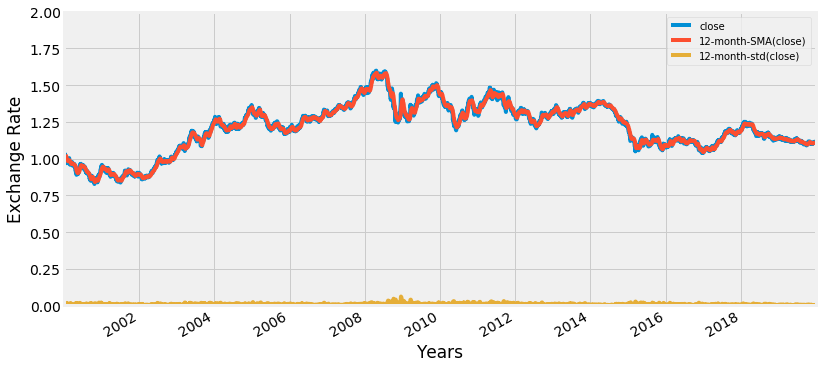

In [14]:
eurusd['12-month-SMA(close)'] = eurusd['close'].rolling(window=12).mean()
eurusd['12-month-std(close)'] = eurusd['close'].rolling(window=12).std()
eurusd[['close', '12-month-SMA(close)', '12-month-std(close)']].plot()
plt.ylim(0, 2)
plt.xlabel('Years', size=17)
plt.ylabel('Exchange Rate', size=17)
plt.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight'
plt.tick_params(labelsize=14)
mpl.rcParams['figure.figsize'] = 12,6

From the chart above, it is clear that the Standard deviation is stationary, while the mean is not

In [15]:
#eurusd['shift'] =  eurusd['close'].shift(1)
#eurusd.head()

In [16]:
#eurusd['d1close'] = eurusd['close']  -  eurusd['close'].shift(1)
#eurusd[['d1close', 'close']].head()

In [17]:
#eurusd['d1close'].plot(title='First order difference').autoscale(axis='x', tight='True')

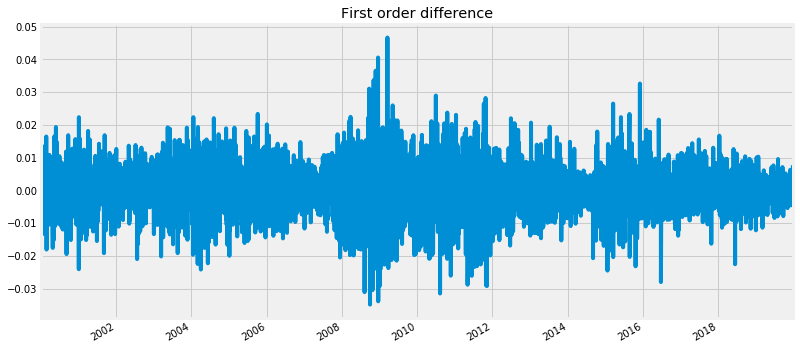

In [18]:
eurusd['d1close'] = eurusd['close'].diff()
eurusd['d1close'].plot(title='First order difference').autoscale(axis='x', tight='True')

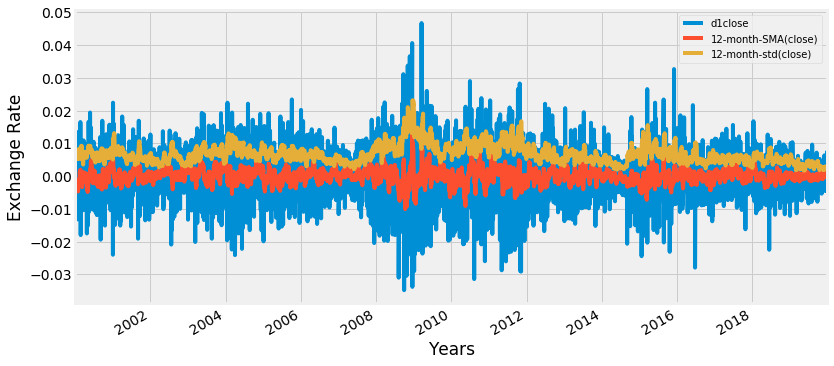

In [19]:
eurusd['12-month-SMA(close)'] = eurusd['d1close'].rolling(window=12).mean()
eurusd['12-month-std(close)'] = eurusd['d1close'].rolling(window=12).std()
eurusd[['d1close', '12-month-SMA(close)', '12-month-std(close)']].plot()
plt.xlabel('Years', size=17)
plt.ylabel('Exchange Rate', size=17)
plt.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight'
plt.tick_params(labelsize=14)
mpl.rcParams['figure.figsize'] = 12,6

In [20]:
print('Augmented Dickey-Fuller Test on EURUSD Exchange Rate Data')
dftest = adfuller(eurusd['close'], autolag='AIC')
dftest

Augmented Dickey-Fuller Test on EURUSD Exchange Rate Data


(-1.7338439209888068,
 0.4137648010102527,
 0,
 5186,
 {'1%': -3.4316115772743645,
  '5%': -2.8620974851364487,
  '10%': -2.567066749257732},
 -35987.182541465096)

Hypothesis Testing:
    
The Null hypothesis of this project states that the time series data of eurysd is non-stationary. Using the Dickey fuller test, I will determine below whether or not this is true.

In [21]:
stepwise_fit = auto_arima(eurusd['close'], start_P = 1, start_q = 1, max_p = 3, max_q = 3, m=12, start_p = 0, seasonal =True
                          , d=None, D=1, trace=True, 
                           error_action='ignore', # We don't want to know if an order does not work
                           surpress_warnings=True, #We don't want convergence warnings
                           stepwise=True) #Set to stepwise
stepwise_fit.summary()

Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-23302.437, BIC=-23289.334, Fit time=4.630 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=-34152.047, BIC=-34125.841, Fit time=43.040 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=-26463.775, BIC=-26437.568, Fit time=8.670 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-23304.114, BIC=-23297.563, Fit time=1.705 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-32771.454, BIC=-32751.799, Fit time=5.672 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 0, 12); AIC=-34759.963, BIC=-34727.205, Fit time=103.077 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(2, 1, 1, 12); AIC=-35887.388, BIC=-35848.079, Fit time=92.953 seconds
Near non-invertible roots for order (1, 0, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too clos

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 5187
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 12)   Log Likelihood               18004.703
Date:                            Wed, 01 Jan 2020   AIC                         -35999.406
Time:                                    21:00:21   BIC                         -35966.648
Sample:                                         0   HQIC                        -35987.944
                                           - 5187                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.758e-06   1.72e-06     -1.024      0.306   -5.12e-06    1.61e-06
ar.L1          0.9946      0.001   1519.980      0.000       0.993       0.996
ar.S.L12      -0.0258      0.012     -2.181      0.029      -0.049      -0.003
ma.S.L12      -0.9986      0.008   -127.054      0.000      -1.014      -0.983
sigma2       5.59e-05   8.82e-07     63.369      0.000    5.42e-05    5.76e-05
===================================================================================
Ljung-Box (Q):                       76.72   Jarque-Bera (JB):               861.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
#First order differencing

#import statsmodels.tsa.statespace.tools 
##import diff
#eurusd['d1'] = diff(eurusd['close'], k_diff = 1)

In [23]:
print('Augmented Dickey-Fuller Test on EURUSD Exchange Rate Data')
dfout = pd.Series(dftest[0:4], index = ['ADF Test Statistic', 'p-value', '# lags used', '# observations'])

for key, val in dftest[4].items():
    dfout[f'critical value({key})']=val
    print(dfout)

Augmented Dickey-Fuller Test on EURUSD Exchange Rate Data
ADF Test Statistic      -1.733844
p-value                  0.413765
# lags used              0.000000
# observations        5186.000000
critical value(1%)      -3.431612
dtype: float64
ADF Test Statistic      -1.733844
p-value                  0.413765
# lags used              0.000000
# observations        5186.000000
critical value(1%)      -3.431612
critical value(5%)      -2.862097
dtype: float64
ADF Test Statistic       -1.733844
p-value                   0.413765
# lags used               0.000000
# observations         5186.000000
critical value(1%)       -3.431612
critical value(5%)       -2.862097
critical value(10%)      -2.567067
dtype: float64


The P-value above is greater than 5% using the dickey fuller test, hence we accept the null-hypothesis to be true, that our time series data for eurusd is non-stationary

MACHINE LEARNING

ARIMA MODEL

In [24]:
eurusd.shape

(5187, 9)

In [45]:
train = eurusd.close.iloc[:4457]
test  = eurusd.close.iloc[4457:]

In [66]:
test

2017-03-08    1.05393
2017-03-09    1.05761
2017-03-10    1.06699
2017-03-13    1.06530
2017-03-14    1.06038
               ...   
2019-12-20    1.10748
2019-12-23    1.10884
2019-12-24    1.10877
2019-12-26    1.10952
2019-12-27    1.11726
Name: close, Length: 730, dtype: float64

In [47]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults, ARIMA, ARIMAResults

In [50]:
model = ARIMA(train, order = (1,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 4457
Model:                     ARMA(1, 0)   Log Likelihood               15359.072
Method:                       css-mle   S.D. of innovations              0.008
Date:                Wed, 01 Jan 2020   AIC                         -30712.144
Time:                        21:18:15   BIC                         -30692.937
Sample:                             0   HQIC                        -30705.373
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1627      0.102     11.436      0.000       0.963       1.362
ar.L1.close     0.9990      0.001   1719.689      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0010           +0.0000j            1.0010            0.0000
-----------------------------------------------------------------------------
"""

In [84]:
# Obtain predicted values

start = len(train)
end = len(train) + len(test)
predictions = results.predict(start = start, end = end, dynamic = False).rename('ARIMA(1,0,0) Predictions')
#, typ='levels'

In [89]:
# Compare predictions to expected values
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]

KeyError: 0

In [75]:
forecast_errors

NameError: name 'forecast_errors' is not defined

In [43]:
# Plot predictions against known values
ax = test['close'].plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis = 'x', tight=True)

ValueError: year 0 is out of range

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000208810EC6A8> (for post_execute):


ValueError: year 0 is out of range

ValueError: year 0 is out of range

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['close'], predictions)
print(f'ARIMA(1,0,0) MSE Error {error}')

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['close'], predictions)
print(f'ARIMA(1,0,0) RMSE Error: {error:11.10}')

#### Retrain the model on the full data, and forecast the future

In [ ]:
model = ARIMA(eurusd['close'], order=(1,0,0))
results = model.fit()
fcast = results.predict(len(airline), len(airline)+365*10, typ='levels').rename('ARIMA(1,0,0)Forecast')

In [ ]:
# Plot predictions against known values

ax = eurusd['close'].plot(legend=True, figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)

#### SARIMAX MODEL

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model  = SARIMAX(train['close'], order=(1,0,0), seasonal_order=(1,1,1,12), enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              close   No. Observations:                 4457
Model:             SARIMAX(1, 0, 0)x(1, 1, 1, 12)   Log Likelihood               15286.125
Date:                            Tue, 31 Dec 2019   AIC                         -30564.250
Time:                                    10:32:12   BIC                         -30538.652
Sample:                                         0   HQIC                        -30555.225
                                           - 4457                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9977      0.001   1336.394      0.000       0.996       0.999
ar.S.L12       0.0001      0.013      0.008      0.993      -0.025       0.025
ma.S.L12      -0.9974      0.005   -193.062      0.000      -1.008      -0.987
sigma2      5.951e-05   9.38e-07     63.421      0.000    5.77e-05    6.14e-05
===================================================================================
Ljung-Box (Q):                       42.29   Jarque-Bera (JB):               612.34
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.06
Prob(H) (two-sided):                  0.87   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start = len(train)
end = len(train) + len(test)-1
predictions = results.predict(start = start, end = end, dynamic = False, typ='levels').rename('SARIMAX(1,0,0) Predictions')

In [33]:
# Compare predictions to expected values

for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, expected={test['close'][i]}")

KeyError: 0

In [ ]:
# Plot predictions against known values
ax = test['close'].plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis = 'x', tight=True)

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['close'], predictions)
print(f'SARIMAX(1,0,0) MSE Error {error}')

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['close'], predictions)
print(f'SARIMAX(1,0,0) RMSE Error: {error:11.10}')

#### Retrain Sarimax model

In [ ]:
model = SARIMAX(eurusd['close'], order=(1,0,0), seasonal_order=(2,1,1,12), enforce_invinsibility=False)
results = model.fit()
fcast = results.predict(len(airline), len(airline)+365*10, typ='levels').rename('SARIMAX(1,0,0)Forecast')

In [ ]:
# Plot predictions against known values

ax = eurusd['close'].plot(legend=True, figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)

In [ ]:
#predict next value
predicted = StartARIMAForecasting(eurusdclose, 1,1,0)
#display the value
print('Predicted=%f' % (predicted))

In [ ]:
#Get exchange rates
ActualData = eurusdclose
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]

Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)
#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
plt.plot(TestData)
plt.plot(Predictions, color='red')

In [ ]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction